Patter Recognition
===
### Dimmensionality Reduction Project - MFeat Dataset

* **Professor:**  Alexandre L. M. Levada
* **Students:**
  *    Wesley Nogueira Galvão 
*    


In [1]:
%load_ext autoreload
%autoreload 2

# Importing Libraries



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import KernelPCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, SpectralEmbedding, TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

import os


# Load the dataset
from sklearn.datasets import load_mfeat, fetch_openml

import dimensionality_reduction

# MFeat Pixel

https://datahub.io/machine-learning/mfeat-pixel

## EDA

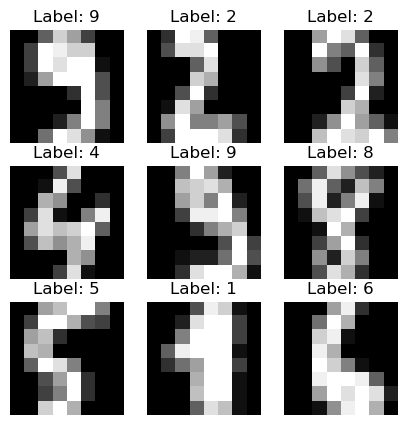

In [5]:
# Carregar o conjunto de dados Mfeat pixel
mfeat_pixel = fetch_openml(name='mfeat-pixel', version=1)

# Obter características e rótulos
features = mfeat_pixel.data
labels = mfeat_pixel.target.astype(int)

In [6]:
# Contar o número de ocorrências de cada label
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))

{0: 178, 1: 182, 2: 177, 3: 183, 4: 181, 5: 182, 6: 181, 7: 179, 8: 174, 9: 180}


# Dimensionality Reduction - Supervised Models

In [8]:
# Define the number of runs
n_runs = 20

In [9]:
# Create an instance of ModelEvaluation for mfeat dataset
dr = dimensionality_reduction.DimensonalityReduction(
    dataset=mfeat_pixel,
    scaler=True,
    random_state=None,
    test_size=.50
)


# Define models to evaluate
models_to_evaluate = {    
    'Perceptron': [Perceptron(max_iter=2000), 'supervised'],
    'Logistic Regression': [LogisticRegression(max_iter=2000), 'supervised'],
    'MLP': [MLPClassifier(max_iter=2000), 'supervised'],
    'KNN':[KNeighborsClassifier(n_neighbors=7), 'supervised'],
    'Nearest Centroid': [NearestCentroid(), 'supervised'],
    'QDA': [QuadraticDiscriminantAnalysis(), 'supervised'],
    'Linear SVM': [SVC(kernel='linear', max_iter=2000), 'supervised'],
    'RBF SVM': [SVC(kernel='rbf', max_iter=2000), 'supervised'],
    # Add more models to evaluate here
}

### RAW data

In [110]:
%%time
# Evaluate models without dimensionality reduction
mfeat_raw = dr.run_multiple_training(models_to_evaluate, use_reduction=False, n_runs=n_runs)
mfeat_raw.to_csv('results/mfeat/mfeat_raw.csv', index=False)
mfeat_raw


/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anaconda3/e

CPU times: user 31.5 s, sys: 1.13 s, total: 32.6 s
Wall time: 4.45 s


,model,Raw Data avg acc,Raw Data std acc
0,Perceptron,0.934372,0.0000
1,Logistic Regression,0.966630,0.0000
2,MLP,0.973304,0.0041
3,KNN,0.969967,0.0000
4,Nearest Centroid,0.868743,0.0000
5,QDA,0.737486,0.0000
6,Linear SVM,0.979978,0.0000
7,RBF SVM,0.981090,0.0000


### PCA

In [118]:
%%time
mfeat_PCA = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='PCA', n_runs=n_runs, n_components=20)
mfeat_PCA.to_csv('results/mfeat/mfeat_PCA.csv', index=False)
mfeat_PCA

/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


CPU times: user 46.2 s, sys: 1.85 s, total: 48 s
Wall time: 6 s


,model,PCA avg acc,PCA std acc
0,Perceptron,0.908343,0.0062
1,Logistic Regression,0.949277,0.0007
2,MLP,0.967519,0.0022
3,KNN,0.961513,0.0005
4,Nearest Centroid,0.891546,0.0006
5,QDA,0.951835,0.0012
6,Linear SVM,0.963293,0.0009
7,RBF SVM,0.970968,0.0003


### LDA

In [119]:
%%time
mfeat_LDA = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='LDA', n_runs=n_runs, n_components=8)
mfeat_LDA.to_csv('results/mfeat/mfeat_LDA.csv', index=False)
mfeat_LDA

CPU times: user 56.8 s, sys: 2.61 s, total: 59.4 s
Wall time: 7.44 s


,model,LDA avg acc,LDA std acc
0,Perceptron,0.919911,0.0000
1,Logistic Regression,0.936596,0.0000
2,MLP,0.941824,0.0022
3,KNN,0.953281,0.0000
4,Nearest Centroid,0.943270,0.0000
5,QDA,0.948832,0.0000
6,Linear SVM,0.937709,0.0000
7,RBF SVM,0.945495,0.0000


### Kernel PCA

In [120]:
%%time
mfeat_KernelPCA = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='KernelPCA', n_runs=n_runs, n_components=20)
mfeat_KernelPCA.to_csv('results/mfeat/mfeat_KernelPCA.csv', index=False)
mfeat_KernelPCA

CPU times: user 58.9 s, sys: 2.08 s, total: 1min
Wall time: 7.63 s


,model,KernelPCA avg acc,KernelPCA std acc
0,Perceptron,0.908788,0.0000
1,Logistic Regression,0.948832,0.0000
2,MLP,0.966852,0.0022
3,KNN,0.962180,0.0000
4,Nearest Centroid,0.890990,0.0000
5,QDA,0.952169,0.0000
6,Linear SVM,0.962180,0.0000
7,RBF SVM,0.971079,0.0000


### ISOMAP

In [121]:
%%time
mfeat_Isomap = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='Isomap', n_runs=n_runs, n_components=20)
mfeat_Isomap.to_csv('results/mfeat/mfeat_Isomap.csv', index=False)
mfeat_Isomap

CPU times: user 2min 53s, sys: 7.57 s, total: 3min 1s
Wall time: 22.7 s


,model,Isomap avg acc,Isomap std acc
0,Perceptron,0.892102,0.0000
1,Logistic Regression,0.943270,0.0000
2,MLP,0.955506,0.0047
3,KNN,0.958843,0.0000
4,Nearest Centroid,0.931034,0.0000
5,QDA,0.942158,0.0000
6,Linear SVM,0.955506,0.0000
7,RBF SVM,0.962180,0.0000


### LLE

In [122]:
%%time
mfeat_LocalLinearEmbedding = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='Localembed', n_runs=n_runs, n_components=20)
mfeat_LocalLinearEmbedding.to_csv('results/mfeat/mfeat_LocalLinearEmbedding.csv', index=False)
mfeat_LocalLinearEmbedding

/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/wesleygalvao/anaconda3/e

CPU times: user 2min 38s, sys: 5.31 s, total: 2min 43s
Wall time: 20.4 s


,model,Localembed avg acc,Localembed std acc
0,Perceptron,0.945495,0.000
1,Logistic Regression,0.948832,0.000
2,MLP,0.966963,0.001
3,KNN,0.959956,0.000
4,Nearest Centroid,0.951057,0.000
5,QDA,0.929922,0.000
6,Linear SVM,0.832036,0.000
7,RBF SVM,0.963293,0.000


### Spectral Embedding

In [123]:
%%time
mfeat_SpectralEmbedding = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='SpectEmbed', n_runs=n_runs, n_components=20)
mfeat_SpectralEmbedding.to_csv('results/mfeat/mfeat_SpectralEmbedding.csv', index=False)
mfeat_SpectralEmbedding

/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


CPU times: user 5min 34s, sys: 14.7 s, total: 5min 48s
Wall time: 43.6 s


,model,SpectEmbed avg acc,SpectEmbed std acc
0,Perceptron,0.177976,0.0000
1,Logistic Regression,0.106785,0.0000
2,MLP,0.177419,0.0051
3,KNN,0.206897,0.0000
4,Nearest Centroid,0.191324,0.0000
5,QDA,0.092325,0.0000
6,Linear SVM,0.150167,0.0000
7,RBF SVM,0.187987,0.0000


### TSNE

In [124]:
%%time
mfeat_Tsne = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='Tsne', n_runs=n_runs, n_components=3)
mfeat_Tsne.to_csv('results/mfeat/mfeat_Tsne.csv', index=False)
mfeat_Tsne


/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/wesleygalvao/anaconda3/envs/mestrado_env/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warning

CPU times: user 32min 20s, sys: 45.6 s, total: 33min 6s
Wall time: 4min 8s


,model,Tsne avg acc,Tsne std acc
0,Perceptron,0.217686,0.0484
1,Logistic Regression,0.267742,0.0074
2,MLP,0.234928,0.0112
3,KNN,0.232925,0.0082
4,Nearest Centroid,0.265406,0.0079
5,QDA,0.257175,0.0132
6,Linear SVM,0.273637,0.0119
7,RBF SVM,0.240156,0.0086


# Data summarizing

In [134]:

# Set model as index
mfeat_raw.set_index('model', inplace=True)
mfeat_PCA.set_index('model', inplace=True)
mfeat_LDA.set_index('model', inplace=True)
mfeat_KernelPCA.set_index('model', inplace=True)
mfeat_Isomap.set_index('model', inplace=True)
mfeat_LocalLinearEmbedding.set_index('model', inplace=True)
mfeat_SpectralEmbedding.set_index('model', inplace=True)
mfeat_Tsne.set_index('model', inplace=True)

In [151]:
all_results = pd.concat([mfeat_raw, mfeat_PCA, mfeat_LDA, mfeat_KernelPCA, mfeat_Isomap, mfeat_LocalLinearEmbedding, mfeat_SpectralEmbedding, mfeat_Tsne], axis=1)
all_results.to_csv('results/mfeat/all_mfeat_supervised.csv')

In [ ]:
# Select columns which contain the word avg
all_mfeat_avg_acc = all_results.filter(like='avg')
all_mfeat_avg_acc.to_csv('results/mfeat/all_mfeat_supervised_avg_acc.csv')
all_mfeat_avg_acc


In [5]:
all_mfeat_avg_acc = pd.read_csv('results/mfeat/all_mfeat_supervised_avg_acc.csv')
all_mfeat_avg_acc

,model,Raw Data avg acc,PCA avg acc,LDA avg acc,KernelPCA avg acc,Isomap avg acc,Localembed avg acc,SpectEmbed avg acc,Tsne avg acc
0,Perceptron,0.934372,0.908343,0.919911,0.908788,0.892102,0.945495,0.177976,0.217686
1,Logistic Regression,0.966630,0.949277,0.936596,0.948832,0.943270,0.948832,0.106785,0.267742
2,MLP,0.973304,0.967519,0.941824,0.966852,0.955506,0.966963,0.177419,0.234928
3,KNN,0.969967,0.961513,0.953281,0.962180,0.958843,0.959956,0.206897,0.232925
4,Nearest Centroid,0.868743,0.891546,0.943270,0.890990,0.931034,0.951057,0.191324,0.265406
5,QDA,0.737486,0.951835,0.948832,0.952169,0.942158,0.929922,0.092325,0.257175
6,Linear SVM,0.979978,0.963293,0.937709,0.962180,0.955506,0.832036,0.150167,0.273637
7,RBF SVM,0.981090,0.970968,0.945495,0.971079,0.962180,0.963293,0.187987,0.240156


In [7]:
all_mfeat_avg_acc.describe()

,Raw Data avg acc,PCA avg acc,LDA avg acc,KernelPCA avg acc,Isomap avg acc,Localembed avg acc,SpectEmbed avg acc,Tsne avg acc
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.926446,0.945537,0.940865,0.945384,0.942575,0.937194,0.161360,0.248707
std,0.085067,0.029405,0.010093,0.029378,0.022881,0.044067,0.041548,0.020031
min,0.737486,0.891546,0.919911,0.890990,0.892102,0.832036,0.092325,0.217686
25%,0.917964,0.939043,0.937430,0.938821,0.939377,0.941602,0.139321,0.234427
50%,0.968298,0.956674,0.942547,0.957175,0.949388,0.949944,0.177697,0.248665
75%,0.974972,0.964349,0.946329,0.963348,0.956340,0.960790,0.188821,0.265990
max,0.981090,0.970968,0.953281,0.971079,0.962180,0.966963,0.206897,0.273637


# Visualizing clusters in 2D

Here we will select the best two dimensionality reduction models and visualize the clusters in 2D.

In [6]:
# Sort by mean accuracy
all_mfeat_avg_acc.describe().loc['mean'].sort_values(ascending=False)

PCA avg acc           0.945537
KernelPCA avg acc     0.945384
Isomap avg acc        0.942575
LDA avg acc           0.940865
Localembed avg acc    0.937194
Raw Data avg acc      0.926446
Tsne avg acc          0.248707
SpectEmbed avg acc    0.161360
Name: mean, dtype: float64

The results show that the best methods to reduce the dimensionality of the dataset are:
- PCA
- Kernel PCA
  
Now, we will reduce the raw data to two components and visualize the clusters in 2D, colorizing each cloud of points according to the labels.

In [14]:
mfeat = load_mfeat()

images = mfeat.images
labels = mfeat.target

dr = dimensionality_reduction.DimensonalityReduction(
    dataset=mfeat,
    scaler=True,
    random_state=None,
    split_data=False
)

X_reduced_PCA, _ = dr.apply_PCA(n_components=2)
X_reduced_KPCA, _ = dr.apply_KernelPCA(n_components=2)
X_reduced_Isomap, _ = dr.apply_Isomap(n_components=2)
X_reduced_LLE, _ = dr.apply_Localembed(n_components=2)
X_reduced_SE, _ = dr.apply_SpectEmbed(n_components=2)
X_reduced_Tsne, _ = dr.apply_Tsne(n_components=2)


print("Features dataset shape before reduction:", X_reduced_PCA.shape)

Features dataset shape before reduction: (1797, 2)


In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot_datasets(datasets, labels, titles, cmap='tab10', figsize=(18, 12), save_as=None):
    assert len(datasets) == len(labels) == len(titles), "Datasets, labels and titles lists must have the same length"
    
    rows = int(np.ceil(len(datasets) / 3))
    fig, axs = plt.subplots(rows, 3, figsize=figsize)
    axs = axs.flatten()  # Flatten the array of axes to easily iterate over it
    
    for i, (data, label, title) in enumerate(zip(datasets, labels, titles)):
        scatter = axs[i].scatter(data[:, 0], data[:, 1], c=label[:data.shape[0]], cmap=cmap)
        axs[i].set_title(title)
        axs[i].set_xlabel('Component 1')
        axs[i].set_ylabel('Component 2')
        cbar = fig.colorbar(scatter, ax=axs[i])
        cbar.set_label('labels')
    
    # If there are less datasets than subplots, remove the extra subplots
    if len(datasets) < len(axs):
        for ax in axs[len(datasets):]:
            fig.delaxes(ax)
    
    if save_as:
        plt.savefig(save_as)
    else:
        plt.show()

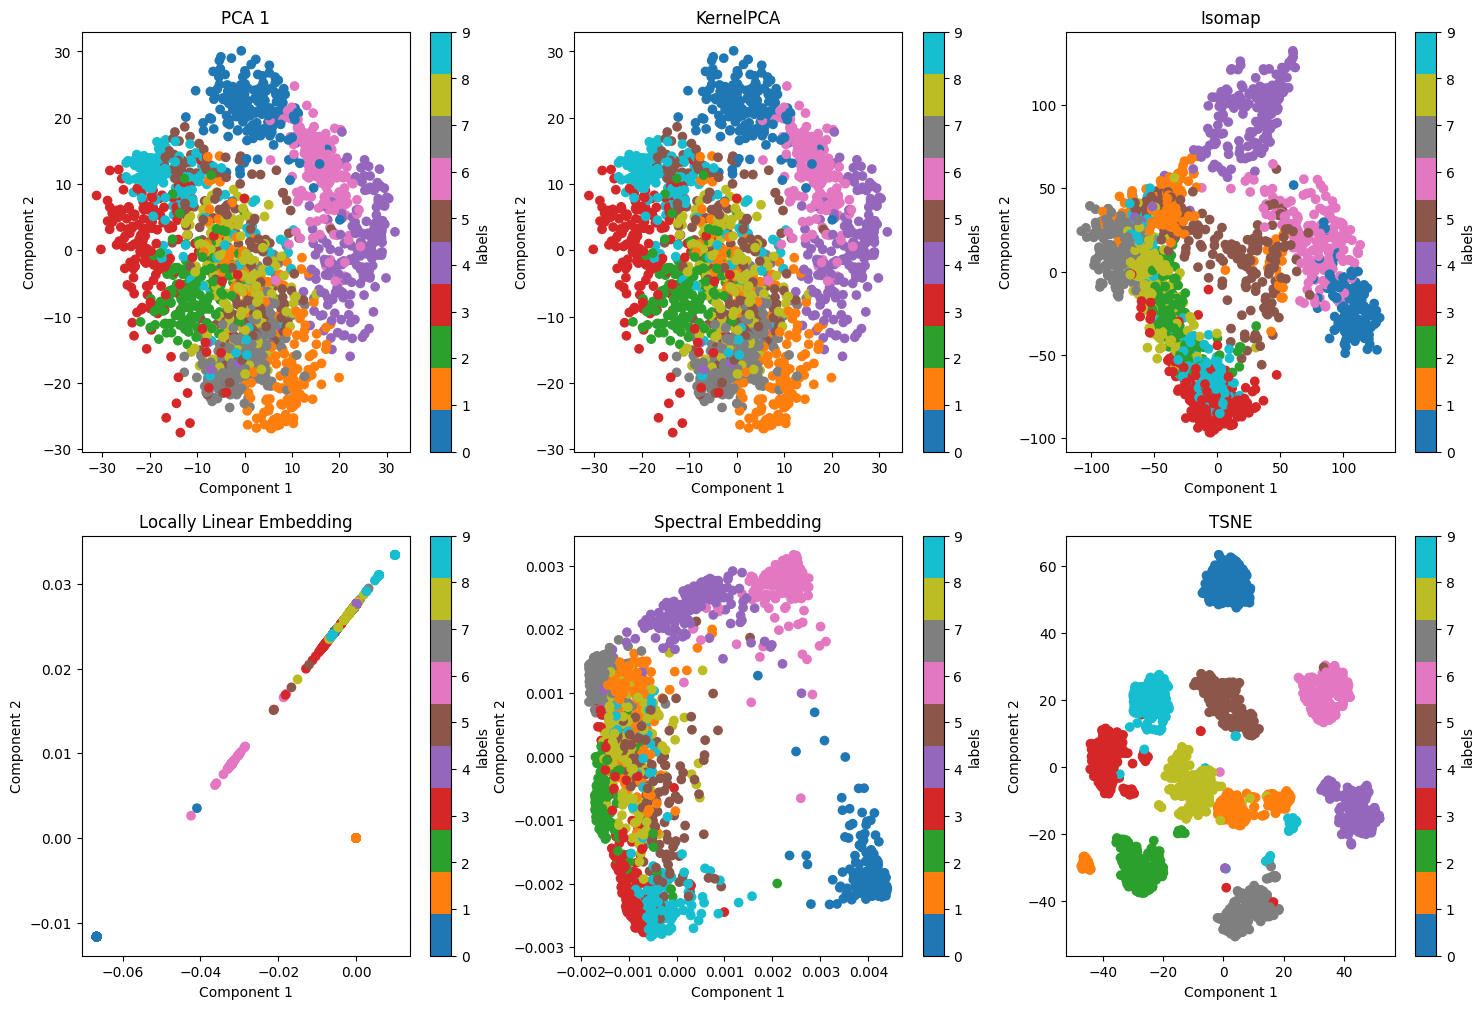

In [41]:
datasets = [X_reduced_PCA, X_reduced_KPCA, X_reduced_Isomap, X_reduced_LLE, X_reduced_SE, X_reduced_Tsne]
labels_ = [labels, labels, labels, labels, labels, labels]
titles = ['PCA 1', 'KernelPCA', 'Isomap', 'Locally Linear Embedding', 'Spectral Embedding', 'TSNE']

plot_datasets(datasets, labels_, titles, save_as='results/mfeat/reduced_mfeat_2D_all_methods.pdf')

# Dimensionality Reduction - Unsupervised Models

In [167]:
# Create an instance of ModelEvaluation for mfeat dataset
dr = dimensionality_reduction.DimensonalityReduction(
    dataset=mfeat,
    scaler=True,
    random_state=None,
    split_data=False
)

# Define models to evaluate
models_to_evaluate = {
    'KMeans': [KMeans(n_clusters=10, n_init=10), 'unsupervised'],
    'GMM': [GaussianMixture(n_components=10), 'unsupervised'],
    # Add more models to evaluate here
}

In [168]:
%%time
# Evaluate models without dimensionality reduction
mfeat_raw = dr.run_multiple_training(models_to_evaluate, use_reduction=False, n_runs=n_runs)
mfeat_raw.to_csv('results/mfeat/mfeat_raw_unsupervised.csv', index=False)
mfeat_raw


CPU times: user 12.7 s, sys: 388 ms, total: 13.1 s
Wall time: 1.64 s


,model,Raw Data avg rand_score,Raw Data std rand_score
0,KMeans,0.665363,0.0050
1,GMM,0.610369,0.0652


In [169]:
%%time
mfeat_PCA = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='PCA', n_runs=n_runs, n_components=20)
mfeat_PCA.to_csv('results/mfeat/mfeat_PCA_unsupervised.csv', index=False)
mfeat_PCA

CPU times: user 7.06 s, sys: 255 ms, total: 7.32 s
Wall time: 919 ms


,model,PCA avg rand_score,PCA std rand_score
0,KMeans,0.666772,0.0022
1,GMM,0.702157,0.0359


In [170]:
%%time
mfeat_LDA = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='LDA', n_runs=n_runs, n_components=8)
mfeat_LDA.to_csv('results/mfeat/mfeat_LDA_unsupervised.csv', index=False)
mfeat_LDA

CPU times: user 3.51 s, sys: 184 ms, total: 3.69 s
Wall time: 467 ms


,model,LDA avg rand_score,LDA std rand_score
0,KMeans,0.914218,0.0007
1,GMM,0.892810,0.0435


In [171]:
%%time
mfeat_KernelPCA = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='KernelPCA', n_runs=n_runs, n_components=20)
mfeat_KernelPCA.to_csv('results/mfeat/mfeat_KernelPCA_unsupervised.csv', index=False)
mfeat_KernelPCA

CPU times: user 33.1 s, sys: 972 ms, total: 34.1 s
Wall time: 4.27 s


,model,KernelPCA avg rand_score,KernelPCA std rand_score
0,KMeans,0.666880,0.0033
1,GMM,0.730017,0.0575


In [179]:
%%time
mfeat_Isomap = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='Isomap', n_runs=n_runs, n_components=20)
mfeat_Isomap.to_csv('results/mfeat/mfeat_Isomap_unsupervised.csv', index=False)
mfeat_Isomap

CPU times: user 1min 23s, sys: 2.89 s, total: 1min 26s
Wall time: 23.1 s


,model,Isomap avg rand_score,Isomap std rand_score
0,KMeans,0.788306,0.0008
1,GMM,0.769853,0.0461


In [173]:
%%time
mfeat_LocalLinearEmbedding = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='Localembed', n_runs=n_runs, n_components=20)
mfeat_LocalLinearEmbedding.to_csv('results/mfeat/mfeat_LocalLinearEmbedding_unsupervised.csv', index=False)
mfeat_LocalLinearEmbedding

CPU times: user 47 s, sys: 1.33 s, total: 48.4 s
Wall time: 6.05 s


,model,Localembed avg rand_score,Localembed std rand_score
0,KMeans,0.446683,0.1014
1,GMM,0.687779,0.0559


In [174]:
%%time
mfeat_SpectralEmbedding = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='SpectEmbed', n_runs=n_runs, n_components=20)
mfeat_SpectralEmbedding.to_csv('results/mfeat/mfeat_SpectralEmbedding_unsupervised.csv', index=False)
mfeat_SpectralEmbedding

CPU times: user 1min 25s, sys: 3.86 s, total: 1min 29s
Wall time: 20 s


,model,SpectEmbed avg rand_score,SpectEmbed std rand_score
0,KMeans,0.595106,0.0579
1,GMM,0.681097,0.0506


In [175]:
%%time
mfeat_Tsne = dr.run_multiple_training(models_to_evaluate, use_reduction=True, reduction_method='Tsne', n_runs=n_runs, n_components=3)
mfeat_Tsne.to_csv('results/mfeat/mfeat_Tsne_unsupervised.csv', index=False)
mfeat_Tsne


CPU times: user 16min 57s, sys: 23.5 s, total: 17min 21s
Wall time: 2min 10s


,model,Tsne avg rand_score,Tsne std rand_score
0,KMeans,0.890530,0.0228
1,GMM,0.857036,0.0465


In [181]:

# Set model as index
mfeat_raw.set_index('model', inplace=True)
mfeat_PCA.set_index('model', inplace=True)
mfeat_LDA.set_index('model', inplace=True)
mfeat_KernelPCA.set_index('model', inplace=True)
mfeat_Isomap.set_index('model', inplace=True)
mfeat_LocalLinearEmbedding.set_index('model', inplace=True)
mfeat_SpectralEmbedding.set_index('model', inplace=True)
mfeat_Tsne.set_index('model', inplace=True)

In [182]:
all_results = pd.concat(
    [
        mfeat_raw,
        mfeat_PCA,
        mfeat_LDA,
        mfeat_KernelPCA,
        mfeat_Isomap,
        mfeat_LocalLinearEmbedding,
        mfeat_SpectralEmbedding,
        mfeat_Tsne
    ],
    axis=1
)
all_results.to_csv('results/mfeat/all_mfeat_unsupervised.csv')

In [ ]:
# Select columns which contain the word avg
all_mfeat_avg_rand = all_results.filter(like='avg')
all_mfeat_avg_rand.to_csv('results/mfeat/all_mfeat_unsupervised_avg_rand.csv')
all_mfeat_avg_rand


In [51]:
all_mfeat_avg_rand = pd.read_csv('results/mfeat/all_mfeat_unsupervised_avg_rand.csv')
all_mfeat_avg_rand

,model,Raw Data avg rand_score,PCA avg rand_score,LDA avg rand_score,KernelPCA avg rand_score,Isomap avg rand_score,Localembed avg rand_score,SpectEmbed avg rand_score,Tsne avg rand_score
0,KMeans,0.665363,0.666772,0.914218,0.666880,0.788306,0.446683,0.595106,0.890530
1,GMM,0.610369,0.702157,0.892810,0.730017,0.769853,0.687779,0.681097,0.857036


In [8]:
all_mfeat_avg_rand.describe()

,Raw Data avg rand_score,PCA avg rand_score,LDA avg rand_score,KernelPCA avg rand_score,Isomap avg rand_score,Localembed avg rand_score,SpectEmbed avg rand_score,Tsne avg rand_score
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,0.637866,0.684465,0.903514,0.698448,0.779080,0.567231,0.638102,0.873783
std,0.038887,0.025020,0.015138,0.044645,0.013048,0.170481,0.060805,0.023684
min,0.610369,0.666772,0.892810,0.666880,0.769853,0.446683,0.595106,0.857036
25%,0.624117,0.675619,0.898162,0.682664,0.774467,0.506957,0.616604,0.865410
50%,0.637866,0.684465,0.903514,0.698448,0.779080,0.567231,0.638102,0.873783
75%,0.651615,0.693311,0.908866,0.714233,0.783693,0.627505,0.659599,0.882157
max,0.665363,0.702157,0.914218,0.730017,0.788306,0.687779,0.681097,0.890530


In [52]:
all_mfeat_avg_rand.describe().loc['mean'].sort_values(ascending=False)

LDA avg rand_score           0.903514
Tsne avg rand_score          0.873783
Isomap avg rand_score        0.779080
KernelPCA avg rand_score     0.698448
PCA avg rand_score           0.684465
SpectEmbed avg rand_score    0.638102
Raw Data avg rand_score      0.637866
Localembed avg rand_score    0.567231
Name: mean, dtype: float64